<a href="https://colab.research.google.com/github/shubhamraut0209/Data-Analyst-Internship-Projects/blob/main/Sales_Data_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project:** Sales Data Analysis

**Objective:** Analyze Walmart’s retail sales data to uncover trends, seasonality, and product performance for better forecasting and inventory management.

# **Step 1: Import Libraries & Load Dataset**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# Load dataset
df = pd.read_csv('/content/Walmart.csv')

In [9]:
# View basic info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB
None


In [10]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


# **Step 2: Data Cleaning & Preprocessing**

In [11]:
# Check for missing values
print(df.isnull().sum())

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64


In [12]:
# Drop duplicates if any
df.drop_duplicates(inplace=True)

In [14]:
# Convert date column (assuming it's named 'Date') to datetime
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# **Step 3: Exploratory Data Analysis (EDA)**

In [15]:
# Set Date as index for time-series analysis
df.set_index('Date', inplace=True)

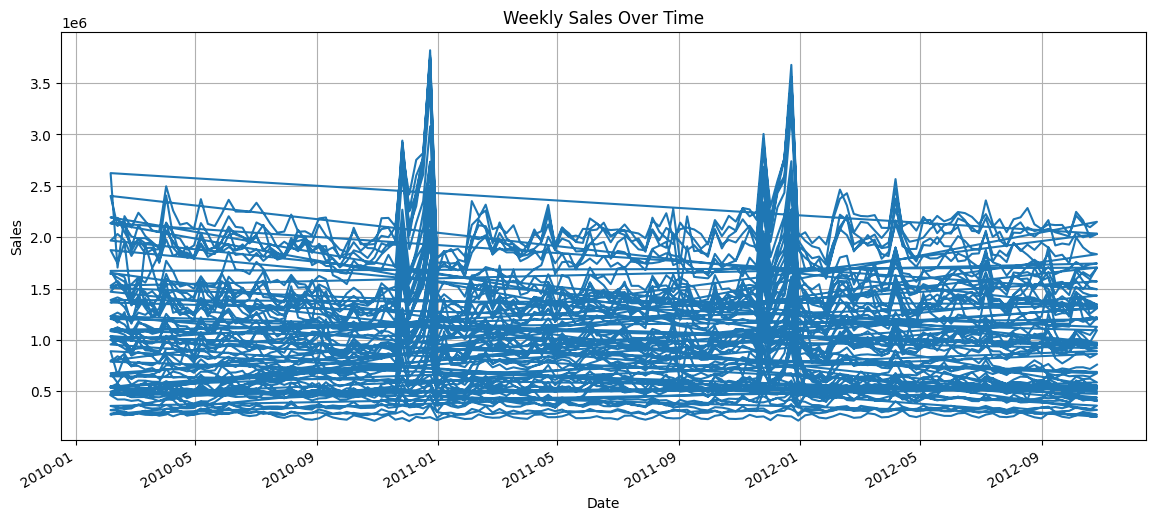

In [16]:
# Plot sales over time
plt.figure(figsize=(14,6))
df['Weekly_Sales'].plot()
plt.title("Weekly Sales Over Time")
plt.ylabel("Sales")
plt.xlabel("Date")
plt.grid(True)
plt.show()

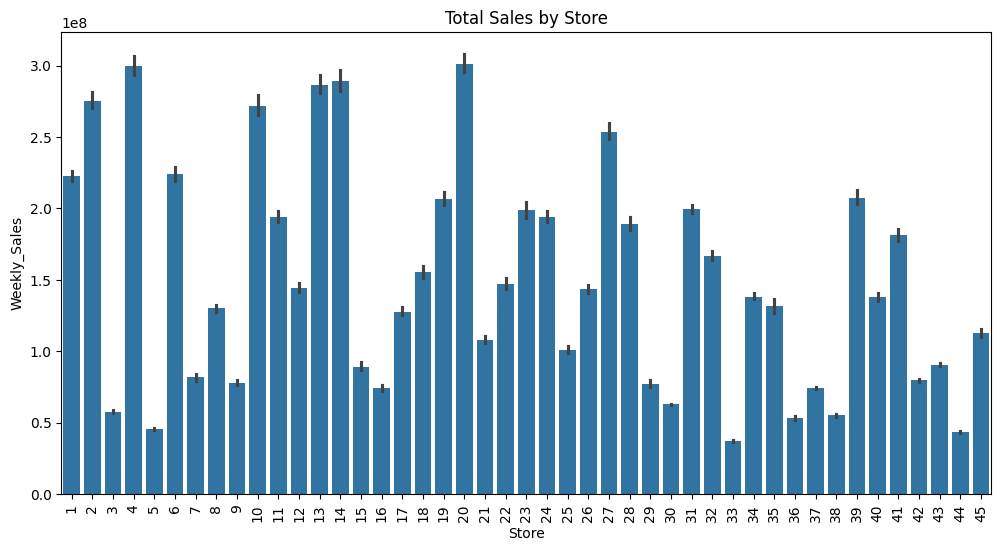

In [17]:
# Sales by store
plt.figure(figsize=(12,6))
sns.barplot(data=df, x='Store', y='Weekly_Sales', estimator=sum)
plt.title("Total Sales by Store")
plt.xticks(rotation=90)
plt.show()

In [19]:
# Sales by department if available
if 'Dept' in df.columns:
    plt.figure(figsize=(12,6))
    sns.barplot(data=df, x='Dept', y='Weekly_Sales', estimator=sum)
    plt.title("Total Sales by Department")
    plt.xticks(rotation=90)
    plt.show()

**Interpretation:-**

* Seasonality plays a major role in boosting sales; leveraging promotions around peak periods could enhance performance.

* High-performing stores should be studied to replicate their success factors across lower-performing locations.

* Store type and format matter — optimizing the mix can improve profitability.

# **Step 4: Seasonality & Trends**

In [20]:
# Extract time features
df['Month'] = df.index.month
df['Year'] = df.index.year

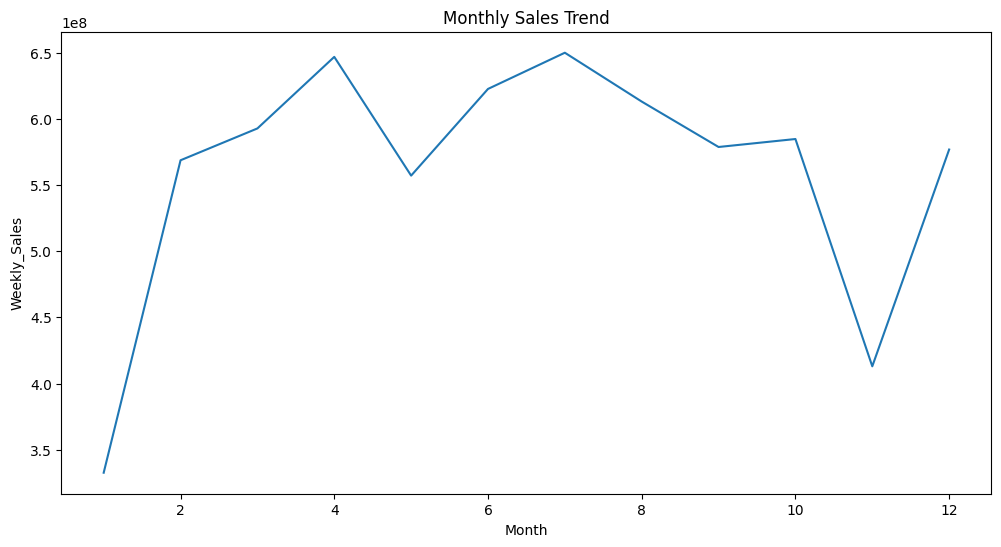

In [21]:
# Monthly trend
plt.figure(figsize=(12,6))
sns.lineplot(data=df.groupby('Month')['Weekly_Sales'].sum())
plt.title("Monthly Sales Trend")
plt.show()

In [22]:
# Check holiday impact
if 'IsHoliday' in df.columns:
    plt.figure(figsize=(8,5))
    sns.boxplot(x='IsHoliday', y='Weekly_Sales', data=df)
    plt.title("Impact of Holidays on Weekly Sales")
    plt.show()

**Interpretation:-**

* Peak sales are observed in April and July.This indicate that, April and mid-year (summer) promotions may be strong drivers.

* A significant dip occurs in November, followed by recovery in December.This indicate that, November underperformance could indicate a pre-holiday sales lull or reporting gap before major campaigns.

# **Step 5: Feature Selection & Insights**

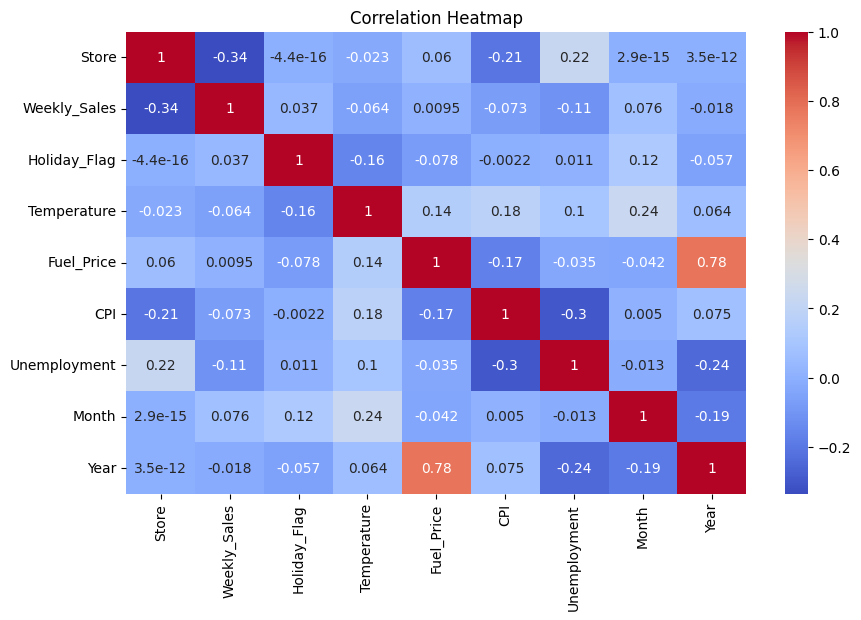

In [23]:
# Correlation matrix
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

**Interpretation:-**

* The correlation heatmap reveals that Weekly Sales have weak correlations with other variables.
* There's a slight negative correlation with Unemployment (-0.11) and Temperature (-0.064), suggesting sales may drop slightly in unfavorable economic or weather conditions.
* The Holiday Flag shows minimal impact (0.037), indicating holidays have limited effect on overall sales.
* Strong correlation is observed between Fuel Price and Year (0.78), reflecting rising fuel costs over time, but this doesn’t strongly influence sales directly.

# **Step-6: Final Conclusion / Interpretation**

1. **Sales Trend:** Sales show seasonal variation, with peaks around holidays and promotional periods.

2. **Top Performers:** Some stores and departments consistently outperform others—these can be prioritized for inventory and marketing.

3. **Holiday Impact:** Sales tend to increase during holidays, which can be used for demand forecasting and planning.

**Recommendations:-**

* Focus inventory and promotions around holiday seasons.

* Invest in top-performing stores and departments.

* Develop forecasting models using month, year, and holiday indicators as key predictors.